In [15]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [16]:
colors=['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']
colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()

In [17]:
"""
define delay tau1
"tau1 = d3*(1+cnst1+2*cnst2)-p1/2"
define delay tau2
"tau2 = d3*(1-cnst2)-p1"
define delay tau3
"tau3 = 2*d3*(1-cnst2)-p1"

define delay tau1p
"tau1p = d3*(1-cnst1+2*cnst2)-p1/2"
"""
def to_str(lst):
    return ["{:10.8f}".format(val) for val in lst]

cnst2=[0,0.05,0.1,0.15,0.2,0.25,0.3]
c1=0.0
us = 10**-6
d3=5*us
p1=1.02*us
tau1 = [d3*(1 + c1 + 2*c2)-p1/2 for c2 in cnst2]
tau2 = [d3*(1-c2) - p1 for c2 in cnst2]
tau3 = [2*d3*(1-c2)-p1 for c2 in cnst2]
tau1p = [d3 * (1 - c1 + 2 * c2) - p1/2 for c2 in cnst2]

str_list = []

str_list.append("define list<delay> tau1 = {" + " ".join(to_str(tau1)) + "}")
str_list.append("define list<delay> tau2 = {" + " ".join(to_str(tau2)) + "}")
str_list.append("define list<delay> tau3 = {" + " ".join(to_str(tau3)) + "}")
str_list.append("define list<delay> tau1p = {" + " ".join(to_str(tau1p)) + "}")

print(f"\n".join(str_list))


define list<delay> tau1 = {0.00000449 0.00000499 0.00000549 0.00000599 0.00000649 0.00000699 0.00000749}
define list<delay> tau2 = {0.00000398 0.00000373 0.00000348 0.00000323 0.00000298 0.00000273 0.00000248}
define list<delay> tau3 = {0.00000898 0.00000848 0.00000798 0.00000748 0.00000698 0.00000648 0.00000598}
define list<delay> tau1p = {0.00000449 0.00000499 0.00000549 0.00000599 0.00000649 0.00000699 0.00000749}


In [18]:
vals=nmr.Experiment(517).load_tpc3d(dipolar=True)

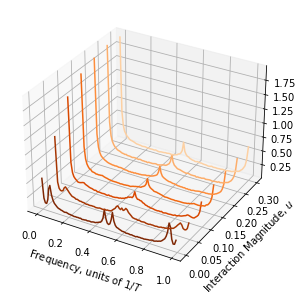

In [20]:
kicks=list(range(100))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals])


plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx in range(len(cnst2)):
    xline = freq
    yline = [cnst2[idx] for _ in range(len(freq))]
    zline = fourier[idx]
    ax.plot3D(xline, yline, zline,color=colors_single[int(idx)])

plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Interaction Magnitude, $u$")
plt.savefig('dipolar_freq_update.pdf')  
plt.show()

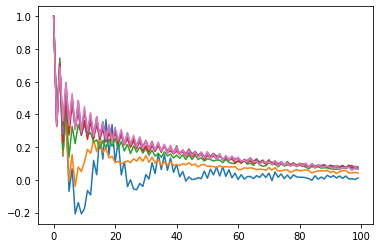

In [23]:
plt.plot(vals.transpose(), label=cnst2)
plt.show()

In [28]:
vals_old=nmr.Experiment(459).load_tpc3d(dipolar=True)
cnst2_old=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
kicks=list(range(100))
freq_old = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360
fourier_old = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals_old])

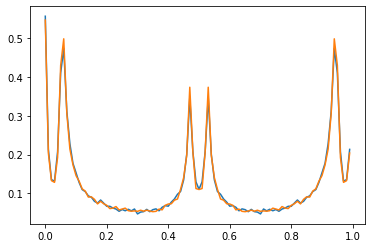

In [29]:
plt.plot(freq,fourier[0])
plt.plot(freq,fourier_old[0])

In [32]:
vals_alt = nmr.Experiment(518).load_tpc3d(dipolar=True)

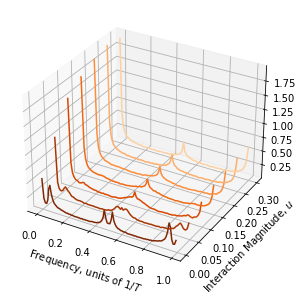

In [33]:
kicks=list(range(100))
eps=(180-170)/360
fourier_alt = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals_alt])


plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx in range(len(cnst2)):
    xline = freq
    yline = [cnst2[idx] for _ in range(len(freq))]
    zline = fourier_alt[idx]
    ax.plot3D(xline, yline, zline,color=colors_single[int(idx)])

plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Interaction Magnitude, $u$")
plt.savefig('dipolar_freq_update.pdf')  
plt.show()

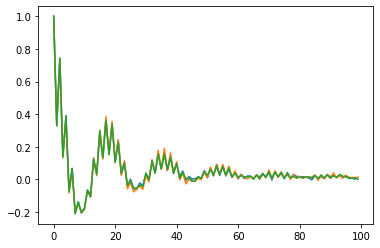

In [34]:
plt.plot(vals[0])
plt.plot(vals_old[0])
plt.plot(vals_alt[0])